# Sales Prediction walmart dataset

![img](../data/Walmart.jpeg)

## Problem Statement
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

## Data Collection
- Dataset: https://www.kaggle.com/datasets/yasserh/walmart-dataset

In [242]:
#importing Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [243]:
df = pd.read_csv("../data/Walmart.csv")

In [244]:
# First look at Data
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Feature information

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate
- Holiday Events
    - Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
    - Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
    - Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
    - Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [246]:
#convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])
#convert Holiday_Flag and store to categorical feature
df['Holiday_Flag'] = df['Holiday_Flag'].astype('object')
df['Store'] = df['Store'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   object        
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 402.3+ KB


In [247]:
# Extracting month and year column from Date
df['month']= df['Date'].dt.month.astype('object')
df['year']= df['Date'].dt.year.astype('object')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


In [248]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [249]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
month           0
year            0
dtype: int64

#### Report
- Great, No null values

## EDA

In [250]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_features.remove('Date')
numeric_features.remove('Weekly_Sales')
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

We have 4 categorical features : ['Store', 'Holiday_Flag', 'month', 'year']


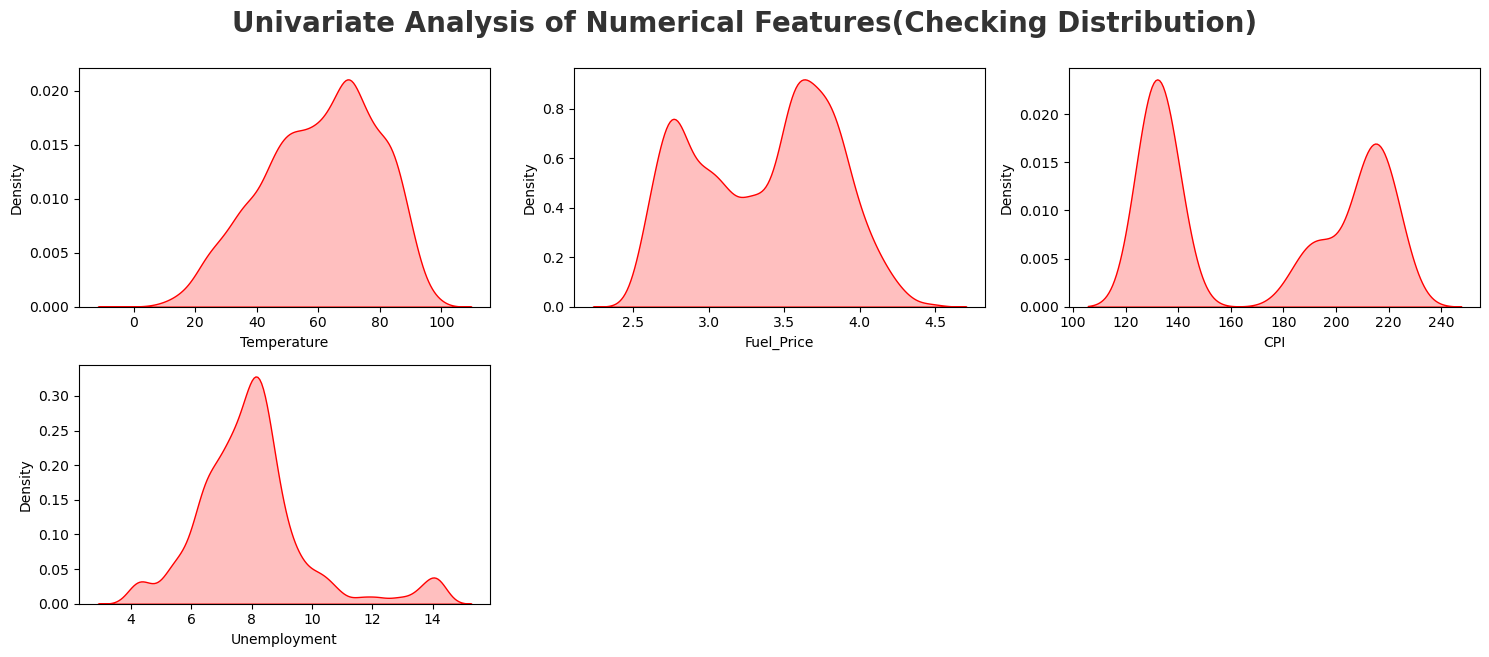

In [251]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features(Checking Distribution)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report
- Data is not normally distributed.
- We try to bring the data to normal by applying different techniques.

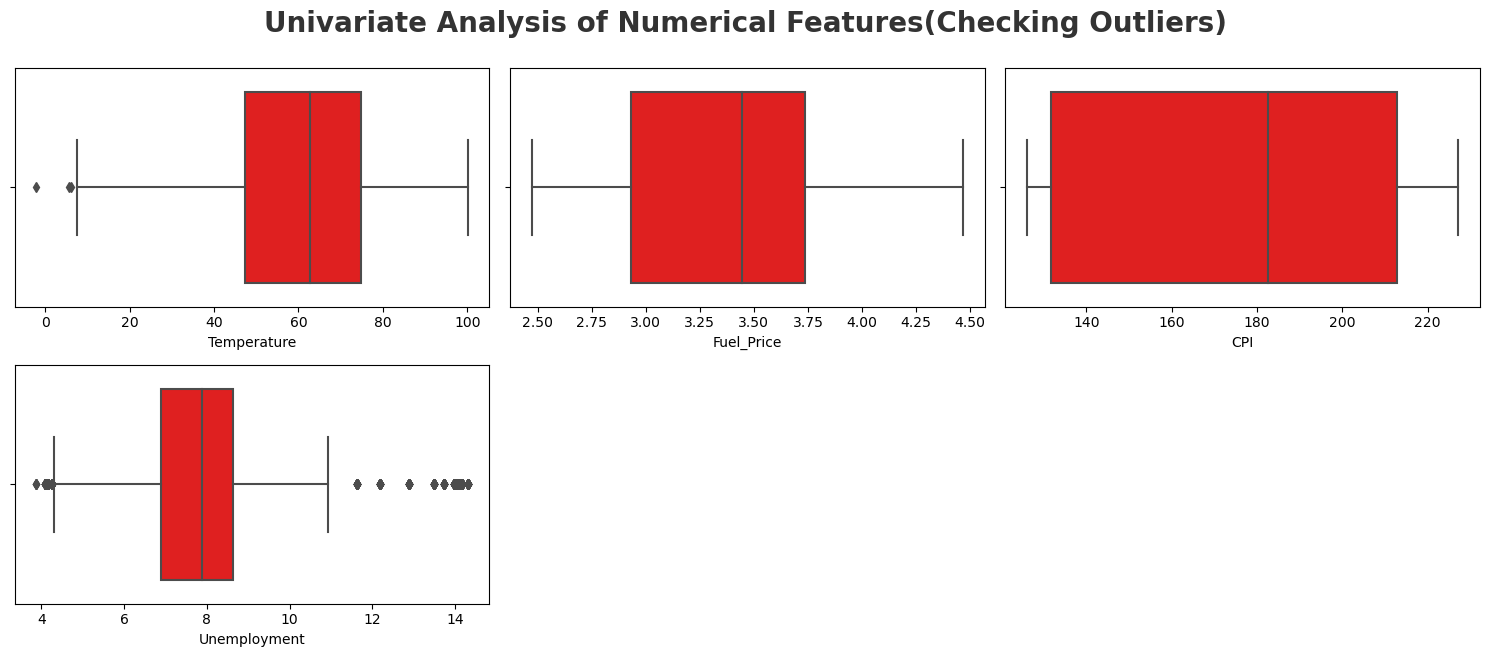

In [252]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features(Checking Outliers)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]], color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report 
- Outleirs present in Temprature and Unemployement.
- We will try to remove outliers by IQR method.

### Top 10 Stores by weekly sales

In [253]:
sales=df.groupby(by='Store')['Weekly_Sales'].sum()

In [254]:
Sales = pd.DataFrame(sales)      
Sales.rename(columns = {'Weekly_Sales':'Sales'},inplace=True)

In [255]:
Sales=Sales.sort_values(by='Sales')

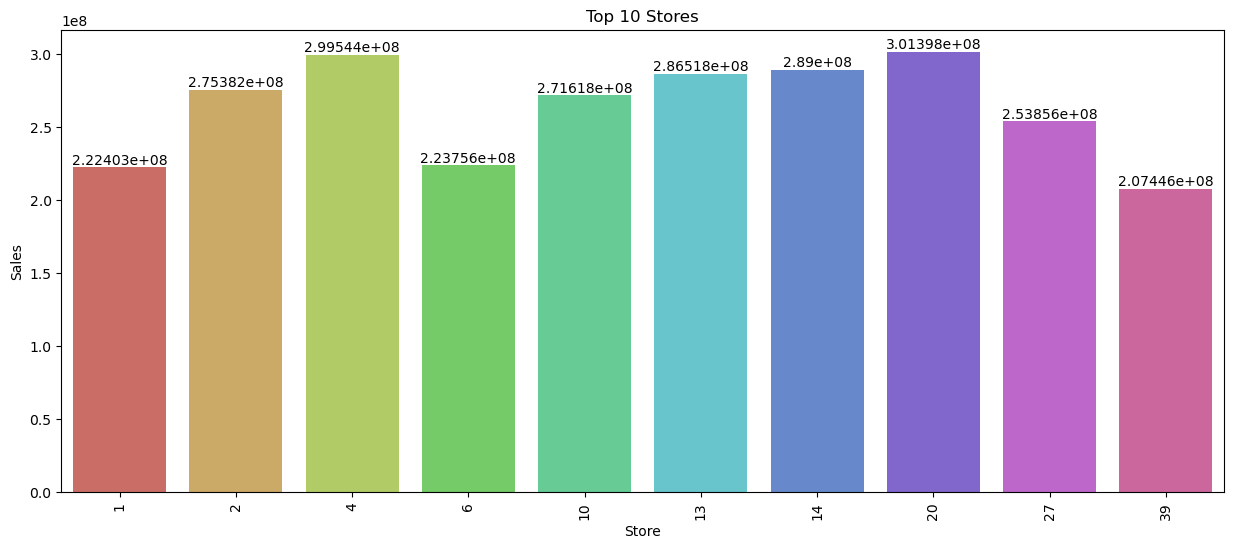

In [256]:
plt.figure(figsize=(15,6))
img= sns.barplot(x=Sales.index[-10:], y ='Sales',data = Sales[-10:],palette='hls')
plt.title('Top 10 Stores')
plt.xticks(rotation=90)
for c in img.containers:
    img.bar_label(c)

#### Report:
- store 20 best porforming Store.

### Bottom 10 Stores

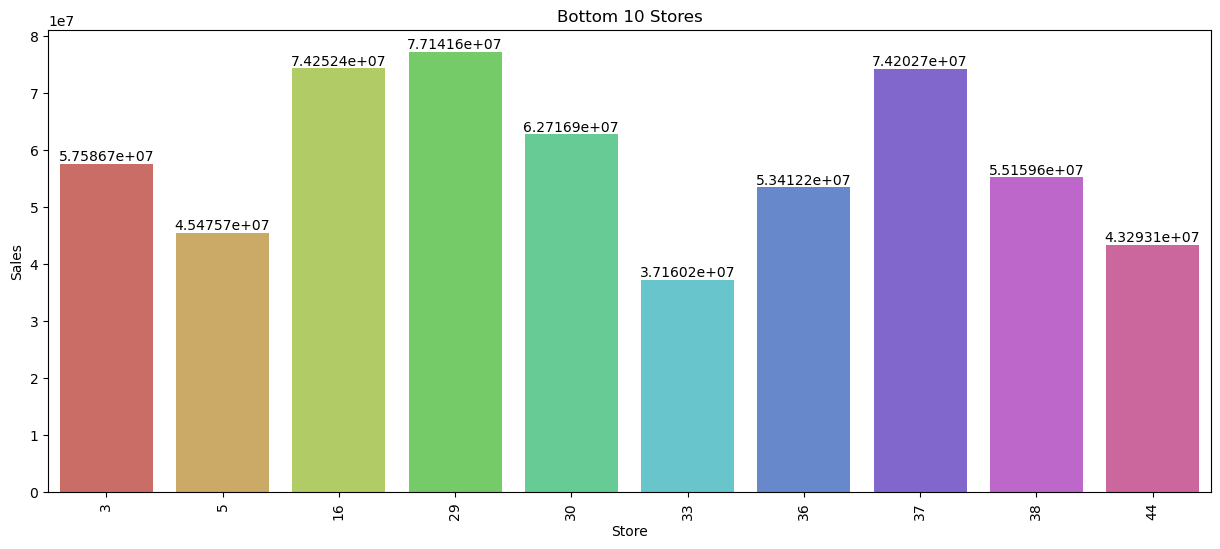

In [257]:
plt.figure(figsize=(15,6))
img= sns.barplot(x=Sales.index[:10], y ='Sales',data = Sales[:10],palette='hls')
plt.title('Bottom 10 Stores')
plt.xticks(rotation=90)
for c in img.containers:
    img.bar_label(c)

#### Report :
- Store 33 is worst performing

### How different factors affect the sales 

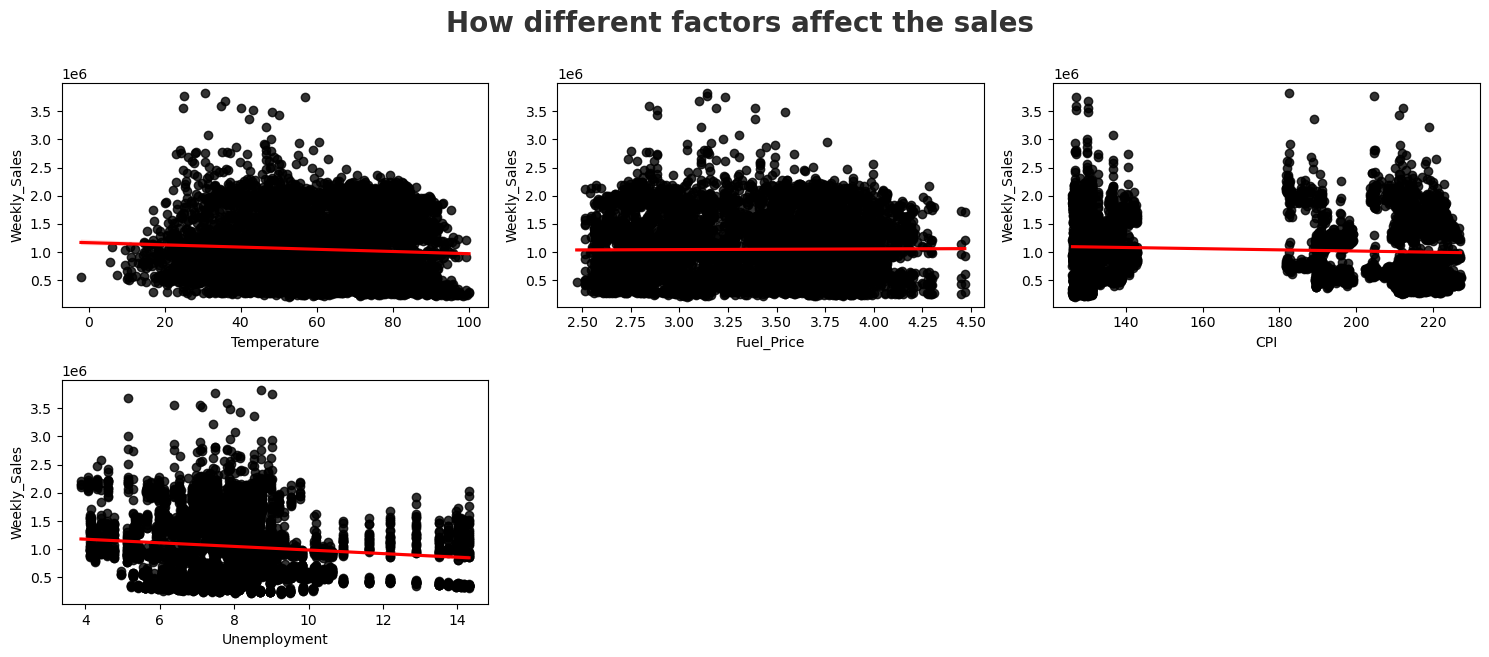

In [258]:
plt.figure(figsize=(15, 15))
plt.suptitle('How different factors affect the sales ', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.regplot(x=df[numeric_features[i]],y=df['Weekly_Sales'],scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report 
- There is slight descrease in sales for increasing temperature,Unemployemnt,CPI
- There is no effect of fuel price on sales

### Which year and was best for walmart

In [259]:
year=df.groupby(by='year')['Weekly_Sales'].sum()

In [260]:
Year = pd.DataFrame(year)      
Year.rename(columns = {'Weekly_Sales':'Sales'},inplace=True)

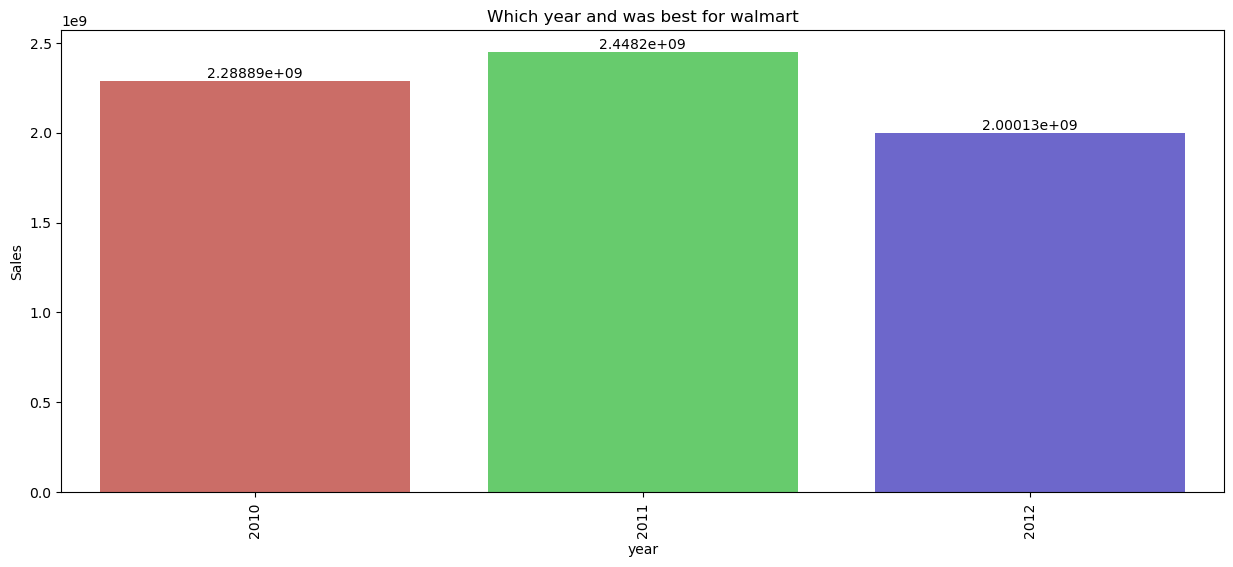

In [261]:
plt.figure(figsize=(15,6))
img= sns.barplot(x=Year.index, y ='Sales',data = Year,palette='hls')
plt.title('Which year and was best for walmart')
plt.xticks(rotation=90)
for c in img.containers:
    img.bar_label(c)

#### Report:
- Clearly, 2011 was best for walmart.

### Which month is best for walmart

In [262]:
month=df.groupby(by='month')['Weekly_Sales'].sum()

In [263]:
Month = pd.DataFrame(month)      
Month.rename(columns = {'Weekly_Sales':'Sales'},inplace=True)

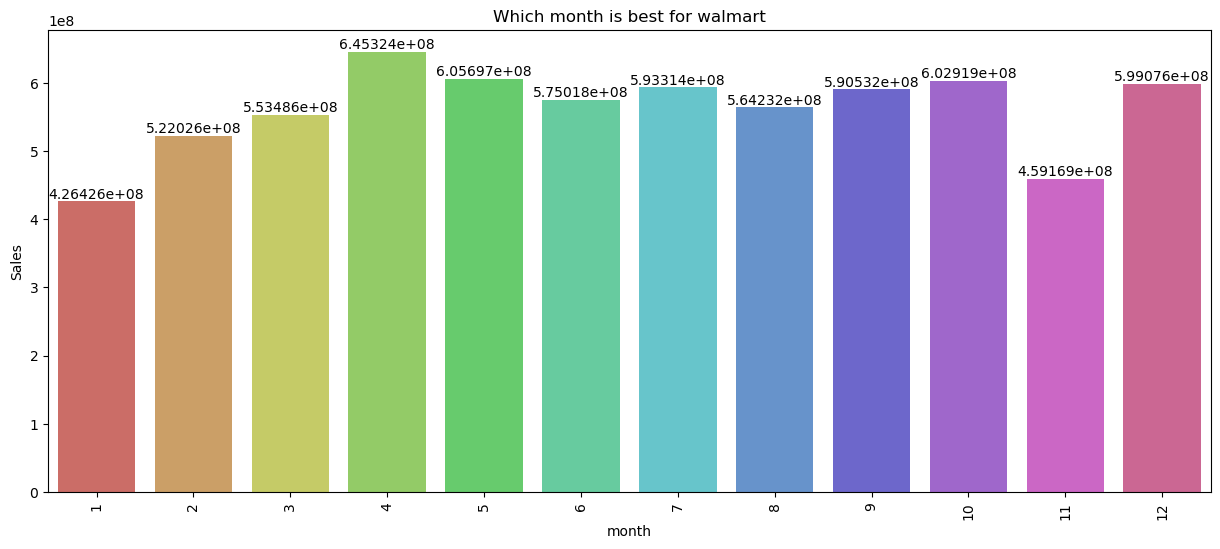

In [264]:
plt.figure(figsize=(15,6))
img= sns.barplot(x=Month.index, y ='Sales',data = Month,palette='hls')
plt.title('Which month is best for walmart')
plt.xticks(rotation=90)
for c in img.containers:
    img.bar_label(c)

#### Report:
- April is the best month for walmart.

### How are Holidays affecting the sales

In [265]:
holiday=df.groupby(by='Holiday_Flag')['Weekly_Sales'].sum()

In [266]:
Holiday = pd.DataFrame(holiday)      
Holiday.rename(columns = {'Weekly_Sales':'Sales'},inplace=True)

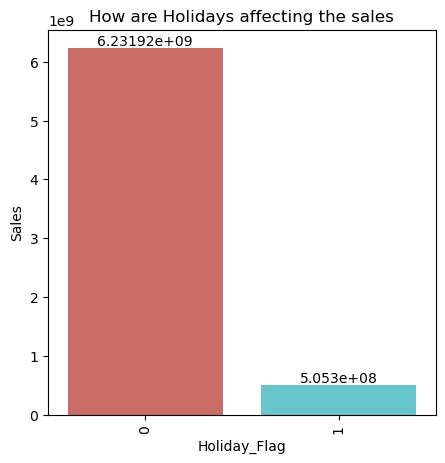

In [267]:
plt.figure(figsize=(5,5))
img= sns.barplot(x=Holiday.index, y ='Sales',data = Holiday,palette='hls')
plt.title('How are Holidays affecting the sales')
plt.xticks(rotation=90)
for c in img.containers:
    img.bar_label(c)

<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

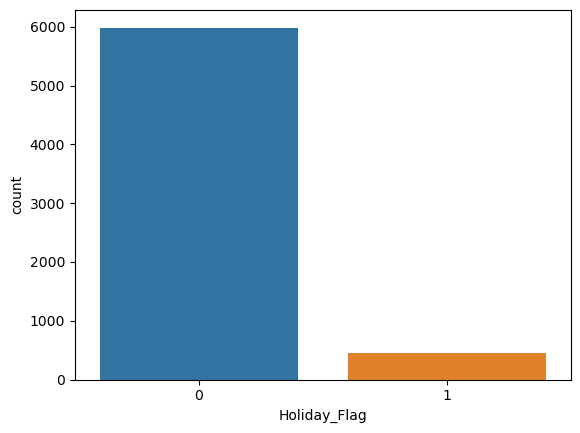

In [268]:
sns.countplot(x=df['Holiday_Flag'])

#### Report
- It will be unfair to directly do analysis on Holiday_Flag as count of holiday is very less compared to no holiday.
- Moving forward, we will do analysis by getting exact number of no holidays days to holiday 

In [269]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [270]:
non_holiday=df[df['Holiday_Flag']==0]

In [271]:
non_holiday_450=non_holiday.sample(df['Holiday_Flag'].value_counts()[1])

In [272]:
holiday_450=df[df['Holiday_Flag']==1]

In [273]:
sample_450= pd.concat([non_holiday_450,holiday_450])

In [274]:
sample_450.shape

(900, 10)

In [275]:
holiday=sample_450.groupby(by='Holiday_Flag')['Weekly_Sales'].sum()

In [276]:
Holiday = pd.DataFrame(holiday)      
Holiday.rename(columns = {'Weekly_Sales':'Sales'},inplace=True)

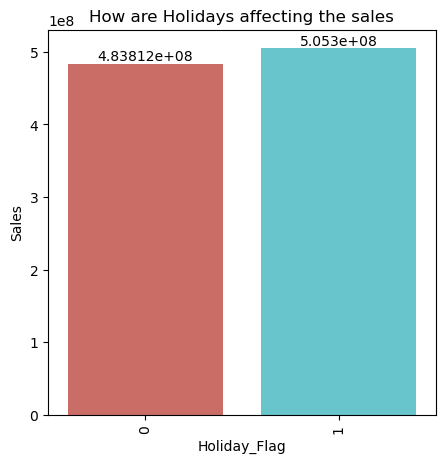

In [277]:
plt.figure(figsize=(5,5))
img= sns.barplot(x=Holiday.index, y ='Sales',data = Holiday,palette='hls')
plt.title('How are Holidays affecting the sales')
plt.xticks(rotation=90)
for c in img.containers:
    img.bar_label(c)

#### Report
- Now in fair comparison, sales for holiday is higher than sales for non holiday.


### Conclusion:
- Sales are less on hotter days. Climate change is global issue and its afftecting the bussiness also.
- Sales are less for prevailng unemoployment rate. 
- April and Holidays months Showed higher sales. During this month walmart can launch sale with high discount to attract more custsomers.

## Feature Engineering

In [278]:
df.drop('Date',axis=1,inplace=True)

In [279]:
# Splitting X and y for all Experiments
X= df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

### Removal of outliers

In [280]:
X1 = X.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = X1[col].quantile(0.25)
    percentile75 = X1[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X1[col] = np.where(X1[col]>upper_limit, upper_limit, np.where(X1[col]<lower_limit,lower_limit,X1[col]))
    return X1[X1[col] > upper_limit]

In [281]:
for col in numeric_features:
    remove_outliers_IQR(col)

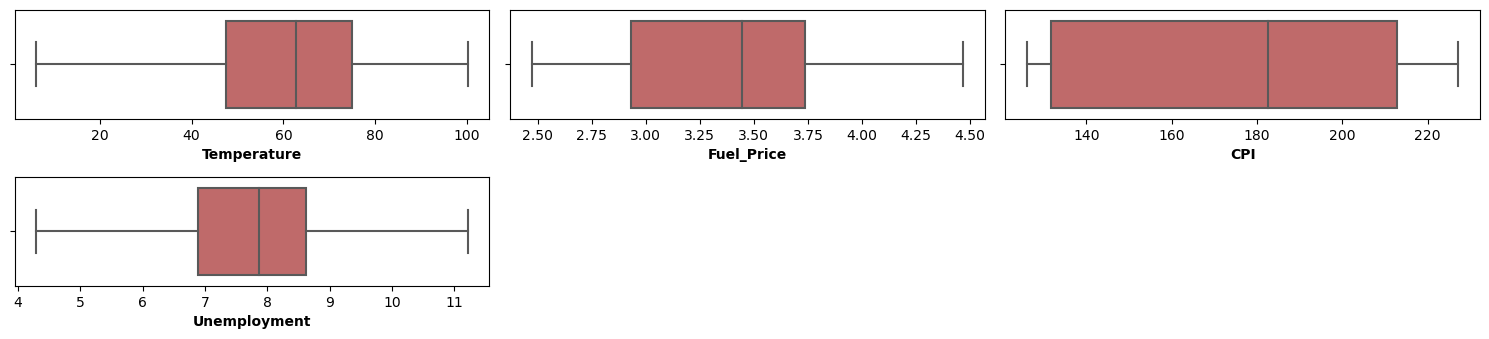

In [282]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=X1[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

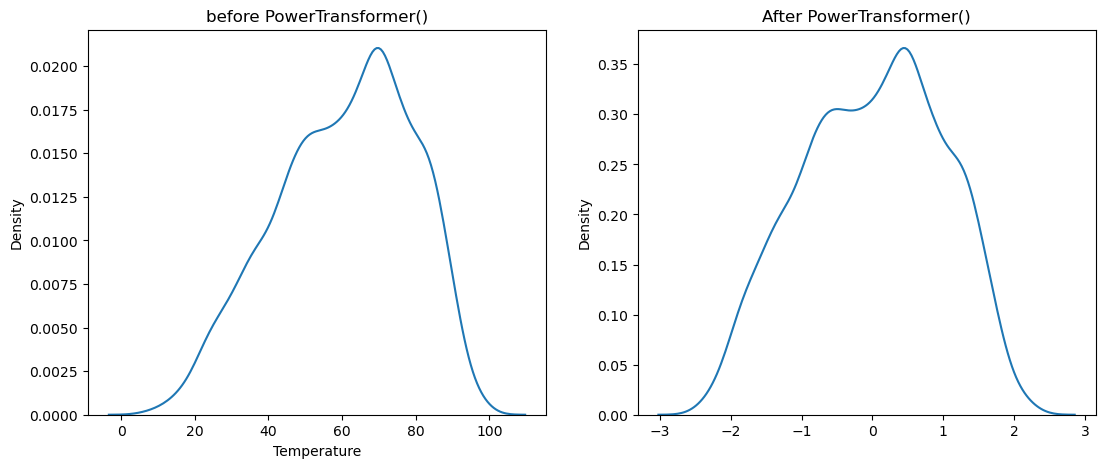

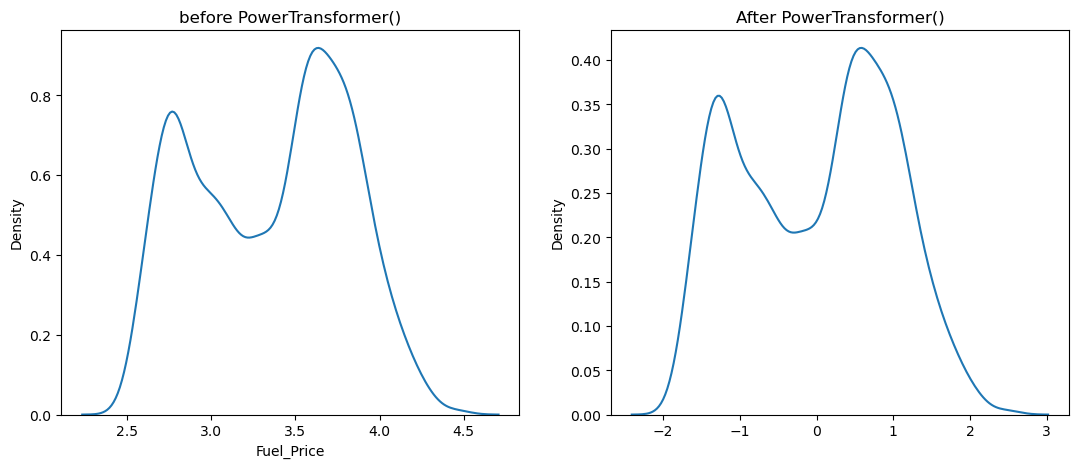

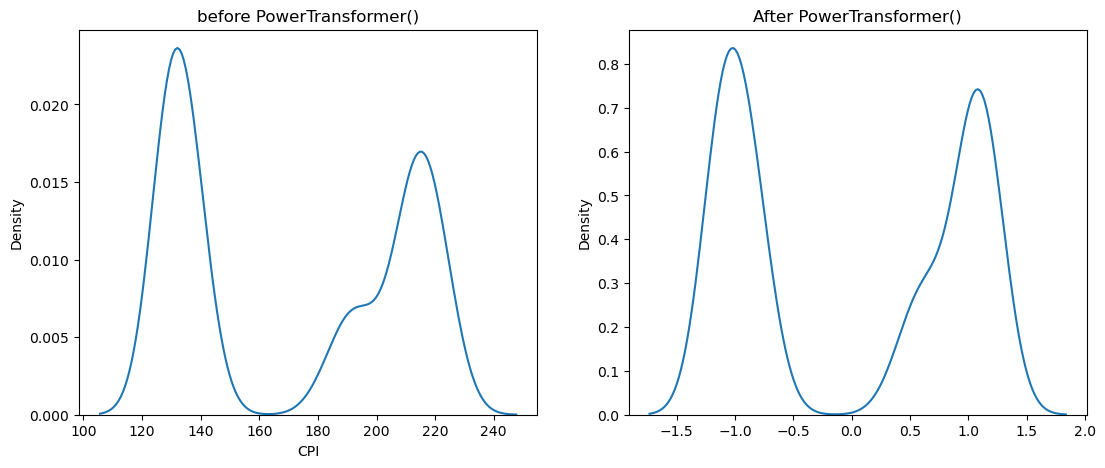

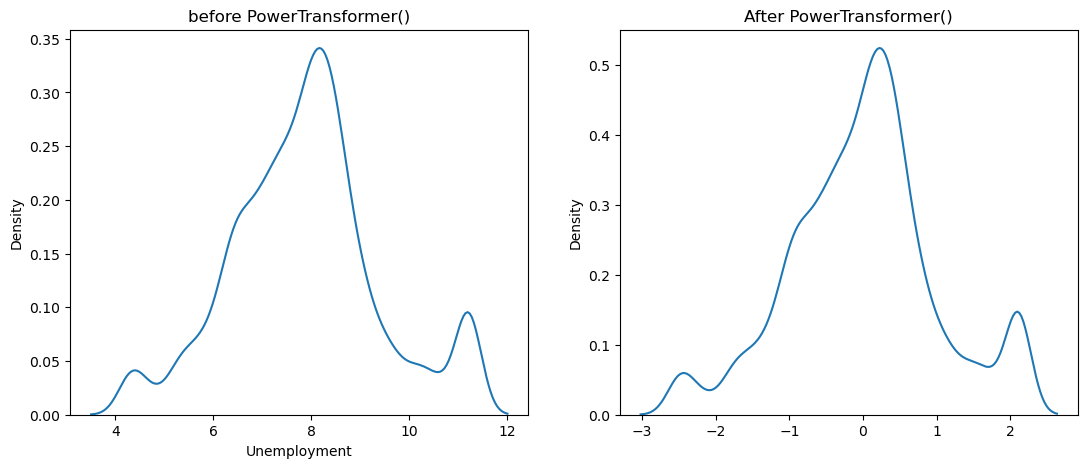

In [283]:
from sklearn.preprocessing import PowerTransformer
X2=X1.copy()
def power_plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t))
for col in numeric_features:
    power_plots(X2,col,PowerTransformer())

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=1)

Text(0.5, 0, 'Relative Importance')

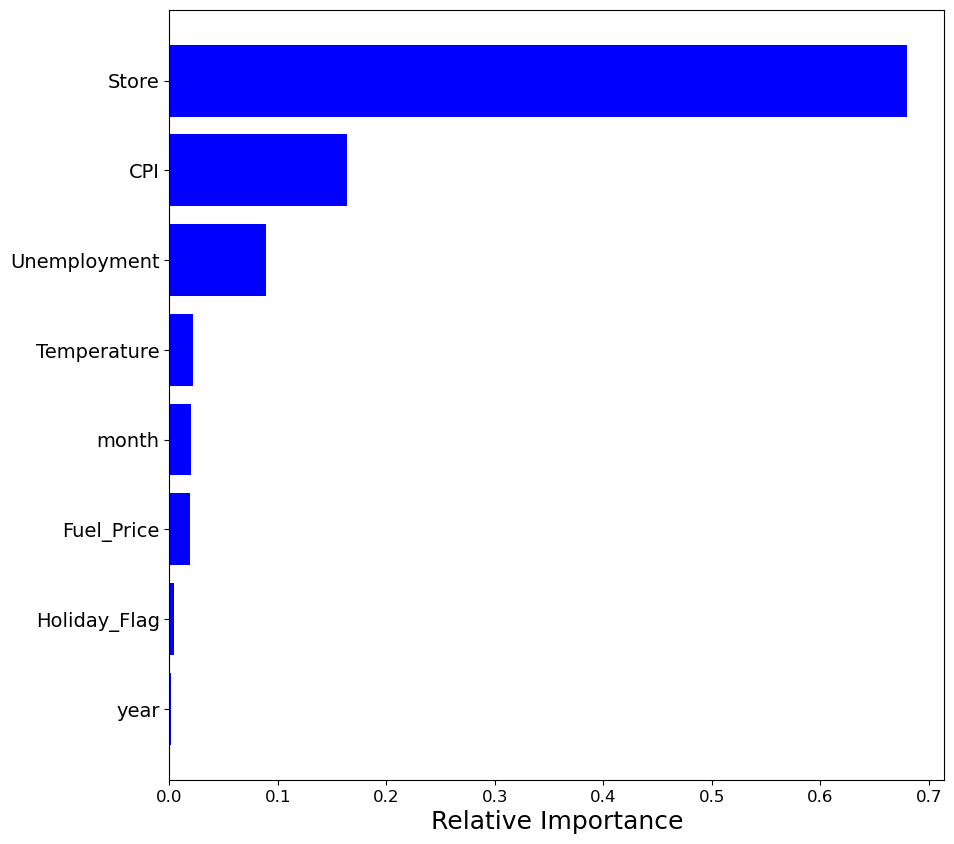

In [285]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rf_reg.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_reg.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

In [286]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train, y_train, cv=5)
    mae = mean_absolute_error(y_train,y_train_pred)
    mse = mean_squared_error(y_train,y_train_pred)
    rmse = np.sqrt(mse)
    rmsle = np.log(rmse)
    r2 = r2_score(y_train,y_train_pred)
    print(f'{model[0]} MAE: {mae}')
    print(f'{model[0]} MSE: {mse}')
    print(f'{model[0]} RMSE: {rmse}')
    print(f'{model[0]} RMSLE: {rmsle}')
    print(f'{model[0]} R2 score: {r2}')


In [287]:
from sklearn.linear_model import LinearRegression
train_model(('Linear Regression', LinearRegression()))

Linear Regression MAE: 429609.66420642816
Linear Regression MSE: 273614262294.8272
Linear Regression RMSE: 523081.5063590255
Linear Regression RMSLE: 13.167492574803372
Linear Regression R2 score: 0.13667981742046142


In [288]:
from sklearn.linear_model import Ridge
train_model(('Ridge Regression', Ridge()))

Ridge Regression MAE: 429608.4024449308
Ridge Regression MSE: 273613990892.28647
Ridge Regression RMSE: 523081.246932335
Ridge Regression RMSLE: 13.167492078844804
Ridge Regression R2 score: 0.13668067376211934


In [289]:
from sklearn.neural_network import MLPRegressor
train_model(('MLPR Regression', MLPRegressor(random_state=1, max_iter=500)))

MLPR Regression MAE: 466040.43128210824
MLPR Regression MSE: 316996045035.6128
MLPR Regression RMSE: 563024.0181693964
MLPR Regression RMSLE: 13.241077567258756
MLPR Regression R2 score: -0.00020035937399565107


In [290]:
from sklearn.linear_model import Lasso
train_model(('Lasso Regression', Lasso()))

Lasso Regression MAE: 429609.58227209945
Lasso Regression MSE: 273614264429.43216
Lasso Regression RMSE: 523081.5083994388
Lasso Regression RMSLE: 13.167492578704127
Lasso Regression R2 score: 0.13667981068525858


In [291]:
from sklearn.tree import DecisionTreeRegressor
train_model(('Decision Tree Regression', DecisionTreeRegressor()))

Decision Tree Regression MAE: 105637.08598357017
Decision Tree Regression MSE: 40922970688.33588
Decision Tree Regression RMSE: 202294.2675617277
Decision Tree Regression RMSLE: 12.217478686430717
Decision Tree Regression R2 score: 0.8708779789838493


In [292]:
from sklearn.ensemble import RandomForestRegressor
train_model(('Random Forest Regression', RandomForestRegressor()))

Random Forest Regression MAE: 80866.05180341918
Random Forest Regression MSE: 22982503697.187275
Random Forest Regression RMSE: 151599.81430459363
Random Forest Regression RMSLE: 11.928999527285923
Random Forest Regression R2 score: 0.9274845575607783


In [293]:
from sklearn.neighbors import KNeighborsRegressor
train_model(('KNN Regression', KNeighborsRegressor()))

KNN Regression MAE: 263449.8476896092
KNN Regression MSE: 145313417710.91003
KNN Regression RMSE: 381199.97076457134
KNN Regression RMSLE: 12.851079374069032
KNN Regression R2 score: 0.5415004859130426


In [294]:
from sklearn.svm import SVR
train_model(('SVM Regression', SVR()))

SVM Regression MAE: 460879.80396862834
SVM Regression MSE: 323937350392.888
SVM Regression RMSE: 569154.9440994851
SVM Regression RMSLE: 13.251907985528398
SVM Regression R2 score: -0.022101882189812905


In [295]:
from sklearn.gaussian_process import GaussianProcessRegressor
train_model(('Gaussian Regression', GaussianProcessRegressor()))

Gaussian Regression MAE: 765455.4432150704
Gaussian Regression MSE: 896794410261.7012
Gaussian Regression RMSE: 946992.2968333487
Gaussian Regression RMSLE: 13.761046237851446
Gaussian Regression R2 score: -1.8296065691531695


In [296]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='r2')

In [297]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [298]:
rf_reg = grid_search.best_estimator_

In [299]:
rf_reg.score(X_test,y_test)*100

93.94899118021702

## Saving the Best Model

In [300]:
import pickle
with open('../artifacts/model.pkl', 'wb') as files:
    pickle.dump(rf_reg, files)